# 🎓 Student Loan Repayment

### Author: Aston Crawley

UK student loans allow tens of thousands of students every year access to higher education. Unlike a traditional loan, some plans of student loans are written off after a certain timeframe. Here we investigate the pros and cons of making additional student loan repayments on top of the mandatory contributions for each of the existing student loan plans.

In [23]:
# Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt

## Plan 2 Student Loans

These are the most commonplace student loans out there, each year of a degree costs £9,000, and you start playing back your loan on the April after you graduate

In [37]:
# Setup some standard parameters based on the average university degree

degree_len = 3
cost_per_year = 9000

write_off_period = 30
study_interest = 1.073 # The interest rate applied to the student loan while you are studying
low_interest_rate = 1.043
high_interest_rate = 1.073

repayment_thresh = 28470 # Annual Plan 2 student loan repayment threshold 2025/26
repayment_multiplier = 0.09 # Percentage of which you must repay over the repayment threshold

Let us calculate the total student loan for a standard 3 year undergraduate degree where no repayments are made

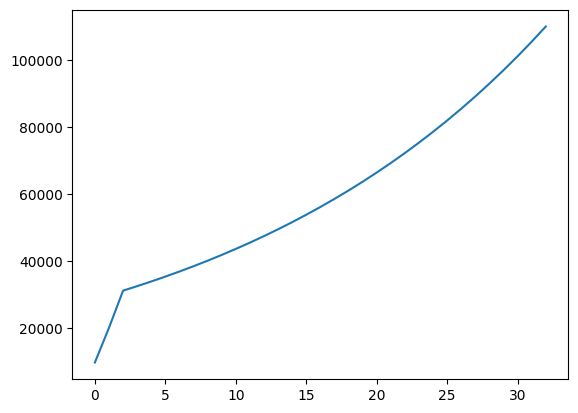

In [38]:
annual_loan_min = []
loan = 0

for i in range(write_off_period + degree_len):
    if i < degree_len: # While the student is studying
        loan = (loan + cost_per_year) * study_interest
        annual_loan_min.append(loan)
    else: # While the student is not studying
        loan = loan * low_interest_rate
        annual_loan_min.append(loan)

plt.plot(annual_loan_min)
plt.show()

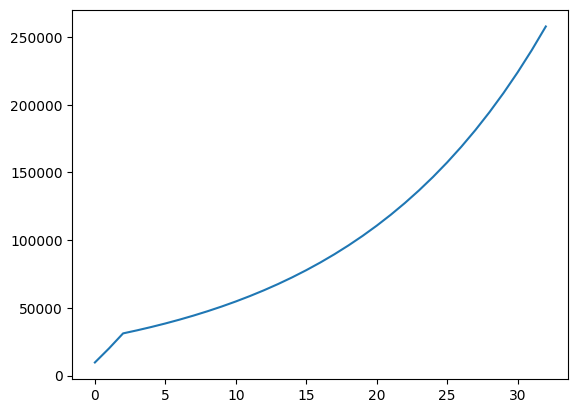

In [39]:
annual_loan_max = []
loan = 0

for i in range(write_off_period + degree_len):
    if i < degree_len: # While the student is studying
        loan = (loan + cost_per_year) * study_interest
        annual_loan_max.append(loan)
    else: # While the student is not studying
        loan = loan * high_interest_rate
        annual_loan_max.append(loan)

plt.plot(annual_loan_max)
plt.show()

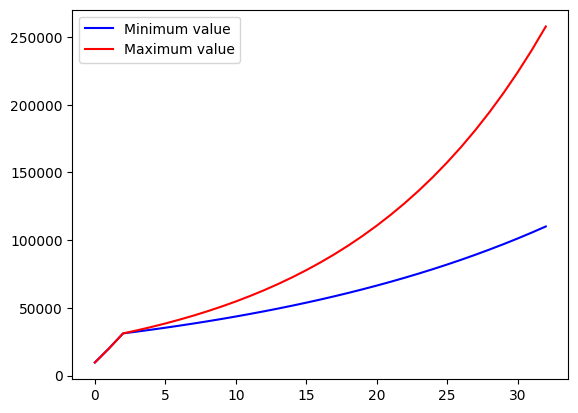

In [ ]:
plt.plot(annual_loan_min, label='Minimum value', color='blue')
plt.plot(annual_loan_max, label='Maximum value', color='red')
plt.legend()
plt.show()

In [41]:
print(f"Total value of the minimum student loan after 30 years is: £{annual_loan_min[-1]}")
print(f"Total value of the maximum student loan after 30 years is: £{annual_loan_max[-1]}")

Total value of the minimum student loan after 30 years is: £110105.9614597771
Total value of the maximum student loan after 30 years is: £257794.2579610263


From this we can see that the approximate total repayments for a student loan 30 years after the completion of their degree is over £100,000 

How Repayments Work:
- You only repay when your pre-tax income exceeds the threshold. 
- You repay 9% of your income above the threshold. 
- Repayments are typically deducted from your salary through Pay As You Earn (PAYE). 

In [42]:
def calculate_interest(rpi, income, low_thresh=28470.00, high_thresh=51245.00):
    """function that calculates the student loan interest rate based on the retail price index and income

    Args:
        rpi (float): retail price index
        income (float): annual income

    Returns:
        float: interest rate to be applied
    """
    
    if income < low_thresh: 
        interest_rate = rpi
    elif income > high_thresh:
        interest_rate = rpi + 3
    else:
        interest_rate = rpi + 3 * ((income - low_thresh) / (high_thresh - low_thresh))
    
    return interest_rate

In [ ]:
def calculate_min_repayment(gross_salary, annual_thresh=28470.00, charge=0.09):
    """function that calculates the minimum monthly repayment of the student loan

    Args:
        gross_salary (float): gross annual salary
        annual_thresh (float): repayment threshold
        charge (float): repayment percentage

    Returns:
        int: minimum monthly repayment amount
    """
    
    monthly_thresh = annual_thresh/12
    
    monthly_repayment = ((gross_salary/12)-monthly_thresh)*charge
    
    if monthly_repayment < 0:
        monthly_repayment = 0
            
    return math.floor(monthly_repayment)

In [1]:
def annual2monthly_interest(annual_interest):
    return (1 + annual_interest)**(1/12) - 1

Let us calculate the salary required in order to break even against the loan interest with the minimum repayments

In [45]:
assumed_rpi = 3
salary = 60000
approx_loan = 30000

annual_interest = calculate_interest(assumed_rpi, salary)
print(annual_interest)

annual_rate = annual_interest/100
print(annual_rate)
monthly_rate = annual2monthly_interest(annual_rate)
print(monthly_rate)

monthly_interest = approx_loan * monthly_rate
print(monthly_interest)

min_repayment = calculate_min_repayment(salary)
print(min_repayment)

annual_repayment = min_repayment*12


6
0.06
0.004867550565343048
146.02651696029145
236


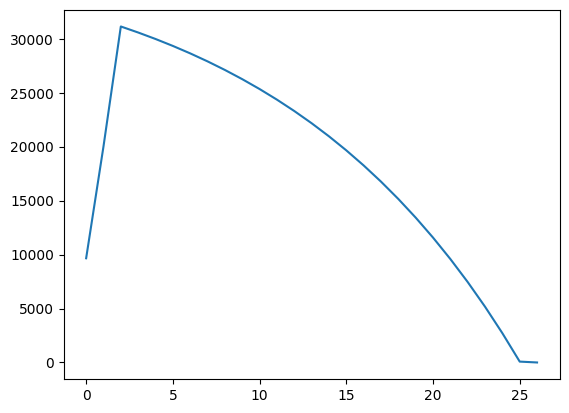

In [46]:
test_annual_loan = []
loan = 0

for i in range(write_off_period + degree_len):
    if i < degree_len: # While the student is studying
        loan = (loan + cost_per_year) * study_interest
        test_annual_loan.append(loan)
    else: # While the student is not studying
        loan = loan * high_interest_rate
        loan -= annual_repayment
        if loan <= 0:
            test_annual_loan.append(0)
            break
        test_annual_loan.append(loan)

plt.plot(test_annual_loan)
plt.show()

In [47]:
# def make_repayment(value):
    

In [48]:
def get_start_date(start_year):
    start_date = f"06-04-{start_year}"
    return start_date

In [49]:
def get_end_date(end_year):
    end_date = f"05-04-{end_year+1}"
    return end_date

In [ ]:
def calculate_daily_interest(amount, interest_rate, start_date, end_date):
    """Calculates the total daily interest acrued between two dates

    Args:
        amount (float): Value to which the daily interest is applied
        interest_rate (float): Annualised interest rate
        start_date (datetime): Date from when the interest period starts
        end_date (datetime): Date until which the interest period ends
    """
    
    period = end_date - start_date
    
    # for i in range(period):
        

In [ ]:
from datetime import datetime, timedelta

# define start and end years
start_year = 2015
end_year = 2018

# get start and end dates
start_date = get_start_date(start_year)
end_date = get_end_date(end_year)

# # define start and end dates
# start_date = datetime(2023, 1, 1)
# end_date = datetime(2023, 1, 10)

# generate list of dates
date_list = [start_date + timedelta(months=x) 
             for x in range((end_date - start_date).months + 1)]

# print results
for d in date_list:
    print(d.date())

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
from datetime import datetime, timedelta

# define start and end dates
start_date = datetime(2023, 1, 4)
end_date = datetime(2023, 12, 10)

# generate list of dates
date_list = [start_date + timedelta(months=x) 
             for x in range((end_date - start_date).months + 1)]

# print results
for d in date_list:
    print(d.date())

AttributeError: 'datetime.timedelta' object has no attribute 'months'

In [ ]:
annual_loan_max

[9657.0,
 20018.961,
 31137.345153,
 33410.371349169,
 35849.32845765833,
 38466.32943506739,
 41274.37148382731,
 44287.4006021467,
 47520.380846103406,
 50989.36864786895,
 54711.59255916338,
 58705.538815982305,
 62991.04314954901,
 67589.38929946609,
 72523.41471832711,
 77817.62399276499,
 83498.31054423683,
 89593.68721396611,
 96134.02638058564,
 103151.81030636838,
 110681.89245873327,
 118761.6706082208,
 127431.27256262091,
 136733.75545969224,
 146715.31960824976,
 157425.537939652,
 168917.60220924657,
 181248.58717052155,
 194479.7340339696,
 208676.75461844937,
 223910.15770559615,
 240255.59921810467,
 257794.2579610263]

How interest on the loan is calculated:
- Loan interest is calculated as RPI + 3% up to the interest rate cap
- Interest is added at the end of each calendar month and is calculated daily
- https://www.gov.uk/guidance/how-interest-is-calculated-plan-2

How minimum repayments are calculated:
- You only repay when your pre-tax income exceeds the threshold. 
- You repay 9% of your income above the threshold. 
- Repayments are typically deducted from your salary through Pay As You Earn (PAYE). 

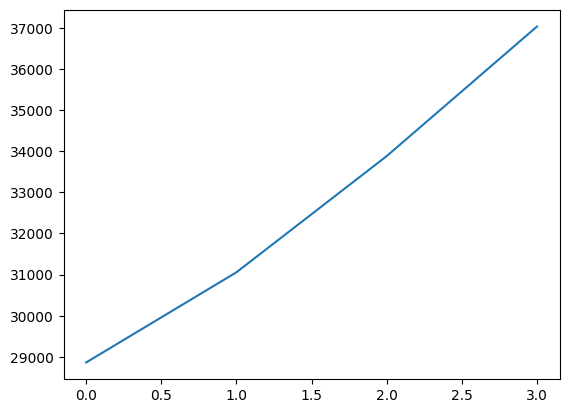

In [ ]:
# test_study_loan = []
# loan = 27000

# study_interest_year_1 = 1.069
# study_interest_year_2 = 1.076
# study_interest_year_3 = 1.091
# study_interest_year_4 = 1.093

# study_interest = [
#     study_interest_year_1,
#     study_interest_year_2,
#     study_interest_year_3,
#     study_interest_year_4
# ]

# for i in study_interest:
#     loan = loan * i
#     test_study_loan.append(loan)

# plt.plot(test_study_loan)
# plt.show()

More complicated one year example test with interest added daily

In [ ]:
from datetime import datetime, timedelta

# Define the start and end dates for the year 2023
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

# Generate a list of all dates in 2023
all_dates = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# # Print the list of dates
# for date in all_dates:
#     print(date.date())

2023-01-01
2023-01-02
2023-01-03
2023-01-04
2023-01-05
2023-01-06
2023-01-07
2023-01-08
2023-01-09
2023-01-10
2023-01-11
2023-01-12
2023-01-13
2023-01-14
2023-01-15
2023-01-16
2023-01-17
2023-01-18
2023-01-19
2023-01-20
2023-01-21
2023-01-22
2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-01-28
2023-01-29
2023-01-30
2023-01-31
2023-02-01
2023-02-02
2023-02-03
2023-02-04
2023-02-05
2023-02-06
2023-02-07
2023-02-08
2023-02-09
2023-02-10
2023-02-11
2023-02-12
2023-02-13
2023-02-14
2023-02-15
2023-02-16
2023-02-17
2023-02-18
2023-02-19
2023-02-20
2023-02-21
2023-02-22
2023-02-23
2023-02-24
2023-02-25
2023-02-26
2023-02-27
2023-02-28
2023-03-01
2023-03-02
2023-03-03
2023-03-04
2023-03-05
2023-03-06
2023-03-07
2023-03-08
2023-03-09
2023-03-10
2023-03-11
2023-03-12
2023-03-13
2023-03-14
2023-03-15
2023-03-16
2023-03-17
2023-03-18
2023-03-19
2023-03-20
2023-03-21
2023-03-22
2023-03-23
2023-03-24
2023-03-25
2023-03-26
2023-03-27
2023-03-28
2023-03-29
2023-03-30
2023-03-31
2023-04-01

In [11]:
def calculate_nominal_daily_interest_rate(interest_rate, days_in_year=365):
    """function that calculates the daily interest rate

    Args:
        interest_rate (float): interest rate
        days_in_year (int, optional): number of days in a year. Defaults to 365.

    Returns:
        float: daily interest rate
    """
    return (1 + interest_rate)**(1/days_in_year) - 1

In [12]:
def calculate_effective_daily_interest_rate(interest_rate, days_in_year=365):
    """function that calculates the daily interest rate

    Args:
        interest_rate (float): interest rate
        days_in_year (int, optional): number of days in a year. Defaults to 365.

    Returns:
        float: daily interest rate
    """
    return interest_rate / days_in_year

In [16]:
initial_amount = 5000
interest_rate = 0.05

nominal_daily_interest_rate = calculate_nominal_daily_interest_rate(interest_rate)
effective_daily_interest_rate = calculate_effective_daily_interest_rate(interest_rate)

nominal_daily_interest = [initial_amount]
effective_daily_interest = [initial_amount]

nominal_amount = initial_amount
effective_amount = initial_amount

for date in range(len(all_dates)):
    nominal_interest = nominal_amount * nominal_daily_interest_rate
    nominal_amount += nominal_interest
    nominal_daily_interest.append(nominal_amount)
    
    effective_interest = effective_amount * effective_daily_interest_rate
    effective_amount += effective_interest
    effective_daily_interest.append(effective_amount)

In [18]:
effective_daily_interest

[5000,
 5000.684931506849,
 5001.3699568399325,
 5002.055076012102,
 5002.740289036214,
 5003.425595925123,
 5004.110996691688,
 5004.796491348769,
 5005.482079909229,
 5006.167762385929,
 5006.8535387917345,
 5007.539409139515,
 5008.2253734421365,
 5008.911431712471,
 5009.597583963391,
 5010.28383020777,
 5010.970170458483,
 5011.656604728409,
 5012.3431330304265,
 5013.029755377417,
 5013.716471782263,
 5014.40328225785,
 5015.090186817063,
 5015.777185472792,
 5016.464278237925,
 5017.151465125355,
 5017.838746147974,
 5018.5261213186795,
 5019.213590650367,
 5019.901154155936,
 5020.588811848286,
 5021.27656374032,
 5021.964409844942,
 5022.652350175057,
 5023.340384743574,
 5024.028513563402,
 5024.716736647452,
 5025.405054008637,
 5026.093465659871,
 5026.781971614071,
 5027.470571884155,
 5028.159266483043,
 5028.848055423658,
 5029.536938718921,
 5030.22591638176,
 5030.9149884251,
 5031.6041548618705,
 5032.293415705002,
 5032.982770967427,
 5033.672220662081,
 5034.3617648

In [ ]:
plan2_interest_schedule = {
    (2012, 9, 1): {"type": "RPI+3%", "min_rate": 0.036, "max_rate": 0.066},
    (2013, 9, 1): {"type": "RPI+3%", "min_rate": 0.033, "max_rate": 0.063},
    (2014, 9, 1): {"type": "RPI+3%", "min_rate": 0.025, "max_rate": 0.055},
    (2015, 9, 1): {"type": "RPI+3%", "min_rate": 0.009, "max_rate": 0.039},
    (2016, 9, 1): {"type": "RPI+3%", "min_rate": 0.016, "max_rate": 0.046},
    (2017, 9, 1): {"type": "RPI+3%", "min_rate": 0.031, "max_rate": 0.061},
    (2018, 9, 1): {"type": "RPI+3%", "min_rate": 0.033, "max_rate": 0.063},
    (2019, 9, 1): {"type": "RPI+3%", "min_rate": 0.024, "max_rate": 0.054},
    (2020, 9, 1): {"type": "RPI+3%", "min_rate": 0.026, "max_rate": 0.056},
    (2021, 7, 1): {"type": "RPI to interest cap", "min_rate": 0.026, "max_rate": 0.053},
    (2021, 9, 1): {"type": "RPI to interest cap", "min_rate": 0.015, "max_rate": 0.042},
    (2021, 10, 1): {"type": "RPI to interest cap", "min_rate": 0.015, "max_rate": 0.041},
    (2022, 1, 1): {"type": "RPI to interest cap", "min_rate": 0.015, "max_rate": 0.044},
    (2022, 3, 1): {"type": "RPI+3%", "min_rate": 0.015, "max_rate": 0.045},
    (2022, 9, 1): {"type": "Interest cap", "min_rate": 0.063, "max_rate": 0.063},
    (2022, 12, 1): {"type": "Interest cap", "min_rate": 0.065, "max_rate": 0.065},
    (2023, 3, 1): {"type": "Interest cap", "min_rate": 0.069, "max_rate": 0.069},
    (2023, 6, 1): {"type": "Interest cap", "min_rate": 0.071, "max_rate": 0.071},
    (2023, 9, 1): {"type": "Interest cap", "min_rate": 0.073, "max_rate": 0.073},
    (2023, 12, 1): {"type": "Interest cap", "min_rate": 0.075, "max_rate": 0.075},
    (2024, 1, 1): {"type": "Interest cap", "min_rate": 0.076, "max_rate": 0.076},
    (2024, 3, 1): {"type": "Interest cap", "min_rate": 0.077, "max_rate": 0.077},
    (2024, 4, 1): {"type": "Interest cap", "min_rate": 0.078, "max_rate": 0.078},
    (2024, 6, 1): {"type": "Interest cap", "min_rate": 0.079, "max_rate": 0.079},
    (2024, 8, 1): {"type": "Interest cap", "min_rate": 0.08, "max_rate": 0.08},
    (2024, 9, 1): {"type": "RPI+3%", "min_rate": 0.043, "max_rate": 0.073},
    (2025, 9, 1): {"type": "RPI+3%", "min_rate": 0.032, "max_rate": 0.062}
}